# 1. Authenticate to Twitter 

In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
consumer_key = "hMrqTAMhXNKmrzGeZc98CIjY8"
consumer_secret = "iAsXsaS2eANc7yxGjNjZQRu42Mm3TU8jI4jqqYk7997RPEcShX"
access_token = "1426283323740102659-zIxze43pd6x0c5gnmZI4DMHldE2nSp"
access_token_secrt = "MT2URFwbD8N6utkHY49yuLm7EDjWtWl9Wv6bCCnVn311x"

In [27]:
# Authenticate 
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secrt)
api = tw.API(auth, wait_on_rate_limit=True)

# 2. Get Tweets

In [ ]:
hashtag = "#JoeBiden"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [ {"Tweets": tweet.text, 'Timestamp': tweet.created_at} for tweet in query ]
tweets

In [97]:
len(tweets)

1000

In [98]:
df_biden = pd.DataFrame.from_dict(tweets)
df_biden.head(10)

,Tweets,Timestamp
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10
5,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...,2021-11-20 11:09:38
6,#ResistTheCult... I am a #PROGRESSIVE #DEMOCRA...,2021-11-20 11:09:02
7,'#Israel' hands over body of unknown person in...,2021-11-20 11:08:34
8,RT @CDNnow: President #JoeBiden’s Schedule for...,2021-11-20 11:07:33
9,#USA President #JoeBiden extended greetings to...,2021-11-20 11:07:24


In [99]:
hashtag = "#DonaldTrump"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [ {"Tweets": tweet.text, 'Timestamp': tweet.created_at} for tweet in query ]

In [100]:
len(tweets)

1000

In [101]:
df_trump = pd.DataFrame.from_dict(tweets)
df_trump.head(10)

,Tweets,Timestamp
0,Random Trump https://t.co/2ARQ3emElf - #random...,2021-11-20 11:12:36
1,RT @GotDamnZo: It’s just hurting my heart how ...,2021-11-20 11:11:31
2,Random Trump https://t.co/gKOtxcV2My - #random...,2021-11-20 11:07:38
3,Sho Sakurai forcing his muslim girlfriend to f...,2021-11-20 11:03:33
4,Random Trump https://t.co/NlIF2csVGI - #random...,2021-11-20 11:02:36
5,RT @DEA_strategy: 📖Leggi l’articolo su Medium:...,2021-11-20 10:59:21
6,Random Trump https://t.co/8phD4pjzTJ - #random...,2021-11-20 10:57:36
7,"GOP Governors Distance Themselves From Trump, ...",2021-11-20 10:55:40
8,Random Trump https://t.co/qoRExzK6k6 - #random...,2021-11-20 10:52:36
9,"RT @Commentary: For most of his memoir, @RepAd...",2021-11-20 10:51:04


In [102]:
df_biden["Biden"] = 1

In [103]:
df_biden.head()

,Tweets,Timestamp,Biden
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38,1
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30,1
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21,1
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38,1
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10,1


In [104]:
df_trump["Trump"] = 1
df_trump.head()

,Tweets,Timestamp,Trump
0,Random Trump https://t.co/2ARQ3emElf - #random...,2021-11-20 11:12:36,1
1,RT @GotDamnZo: It’s just hurting my heart how ...,2021-11-20 11:11:31,1
2,Random Trump https://t.co/gKOtxcV2My - #random...,2021-11-20 11:07:38,1
3,Sho Sakurai forcing his muslim girlfriend to f...,2021-11-20 11:03:33,1
4,Random Trump https://t.co/NlIF2csVGI - #random...,2021-11-20 11:02:36,1


In [105]:
df = pd.concat([df_biden, df_trump])
df.head()

,Tweets,Timestamp,Biden,Trump
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38,1.0,NaN
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30,1.0,NaN
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21,1.0,NaN
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38,1.0,NaN
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10,1.0,NaN


In [106]:
df = df.fillna(0)
df.head()

,Tweets,Timestamp,Biden,Trump
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38,1.0,0.0
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30,1.0,0.0
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21,1.0,0.0
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38,1.0,0.0
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10,1.0,0.0


# 3. Preprocess

In [ ]:
!pip install textblob

In [47]:
# import stopwords 
import nltk
from nltk.corpus import stopwords

# import  textblob
from textblob import Word, TextBlob

In [48]:
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
def preprocess_tweet(tweet):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return preprocessed_tweet

df["Preprocessed_tweet"] = df["Tweets"].apply(lambda x: preprocess_tweet(x))
df.head(10)

,Tweets,Timestamp,Biden,Trump,Preprocessed_tweet
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38,1.0,0.0,RT @acook5ct: 🌟Tomorrow @POTUS birthday 🌟 Plea...
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30,1.0,0.0,#JoeBiden say best part turkey left wing https...
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21,1.0,0.0,USA: Joe Biden podrá seguir comulgando. Les da...
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38,1.0,0.0,RT @GordonGChang: #JoeBiden Wednesday issued s...
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10,1.0,0.0,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን"
5,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...,2021-11-20 11:09:38,1.0,0.0,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...
6,#ResistTheCult... I am a #PROGRESSIVE #DEMOCRA...,2021-11-20 11:09:02,1.0,0.0,#ResistTheCult... I #PROGRESSIVE #DEMOCRAT sta...
7,'#Israel' hands over body of unknown person in...,2021-11-20 11:08:34,1.0,0.0,'#Israel' hand body unknown person instead one...
8,RT @CDNnow: President #JoeBiden’s Schedule for...,2021-11-20 11:07:33,1.0,0.0,RT @CDNnow: President #JoeBiden’s Schedule Fri...
9,#USA President #JoeBiden extended greetings to...,2021-11-20 11:07:24,1.0,0.0,#USA President #JoeBiden extended greeting Sik...


# 4. Calculate Sentiment 

In [108]:
## Getting Sentiment for one Tweet
tw1 = df.loc[0, ["Preprocessed_tweet"]].to_numpy()[0][0]
tw1

'RT @acook5ct: 🌟Tomorrow @POTUS birthday 🌟 Please let’s get ready Best Wishes #JoeBiden November 20 🌟✨⭐️💫🌟⭐️ #HappyBirth…'

In [109]:
TextBlob(tw1).sentiment

Sentiment(polarity=0.6, subjectivity=0.4)

In [110]:
df["Polarity"] = df["Preprocessed_tweet"].apply(lambda x: TextBlob(x).sentiment[0])
df["Subjectivity"] = df["Preprocessed_tweet"].apply(lambda x: TextBlob(x).sentiment[1])

In [111]:
df.head(10)

,Tweets,Timestamp,Biden,Trump,Preprocessed_tweet,Polarity,Subjectivity
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38,1.0,0.0,RT @acook5ct: 🌟Tomorrow @POTUS birthday 🌟 Plea...,0.6,0.40
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30,1.0,0.0,#JoeBiden say best part turkey left wing https...,0.5,0.15
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21,1.0,0.0,USA: Joe Biden podrá seguir comulgando. Les da...,0.0,0.00
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38,1.0,0.0,RT @GordonGChang: #JoeBiden Wednesday issued s...,0.0,0.00
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10,1.0,0.0,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",0.0,0.00
5,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...,2021-11-20 11:09:38,1.0,0.0,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...,0.0,0.00
6,#ResistTheCult... I am a #PROGRESSIVE #DEMOCRA...,2021-11-20 11:09:02,1.0,0.0,#ResistTheCult... I #PROGRESSIVE #DEMOCRAT sta...,0.0,0.00
7,'#Israel' hands over body of unknown person in...,2021-11-20 11:08:34,1.0,0.0,'#Israel' hand body unknown person instead one...,-0.1,0.60
8,RT @CDNnow: President #JoeBiden’s Schedule for...,2021-11-20 11:07:33,1.0,0.0,RT @CDNnow: President #JoeBiden’s Schedule Fri...,0.0,0.00
9,#USA President #JoeBiden extended greetings to...,2021-11-20 11:07:24,1.0,0.0,#USA President #JoeBiden extended greeting Sik...,0.0,0.00


In [123]:
df[df["Biden"] == 1.0][["Biden", "Polarity", "Subjectivity", "Sentiment"]].groupby("Biden").agg([np.mean, np.max, np.min, np.median])

Polarity                   Subjectivity                  Sentiment  \
           mean amax  amin median         mean amax amin median      mean   
Biden                                                                       
1.0    0.043583  1.0 -0.75    0.0     0.145901  1.0  0.0    0.0     1.816   

                        
      amax amin median  
Biden                   
1.0      5    1      1

In [124]:
df[df["Trump"] == 1.0][["Trump", "Polarity", "Subjectivity", "Sentiment"]].groupby("Trump").agg([np.mean, np.max, np.min, np.median])

Polarity                  Subjectivity                  Sentiment       \
           mean amax amin median         mean amax amin median      mean amax   
Trump                                                                           
1.0   -0.071341  0.9 -1.0    0.0      0.32139  1.0  0.0    0.3     1.356    5   

                   
      amin median  
Trump              
1.0      1      1

# 5. Visualize

In [114]:
biden = df[df['Biden']==1][['Timestamp', 'Polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.Polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'Polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.Polarity.rolling(10, min_periods=3).mean()

In [115]:
trump = trump.fillna(0)
trump.head()

,Timestamp,Polarity,MA Polarity
999,2021-11-19 13:56:38,0.00,0.000000
998,2021-11-19 13:57:35,-0.50,0.000000
997,2021-11-19 13:58:11,0.00,-0.166667
996,2021-11-19 14:00:10,-0.35,-0.212500
995,2021-11-19 14:02:36,-0.50,-0.270000


In [116]:
biden = biden.fillna(0)
biden.head()

,Timestamp,Polarity,MA Polarity
999,2021-11-20 03:31:00,0.250000,0.000000
998,2021-11-20 03:31:27,0.000000,0.000000
997,2021-11-20 03:31:40,0.000000,0.083333
996,2021-11-20 03:31:54,-0.300000,-0.012500
995,2021-11-20 03:31:56,0.142857,0.018571


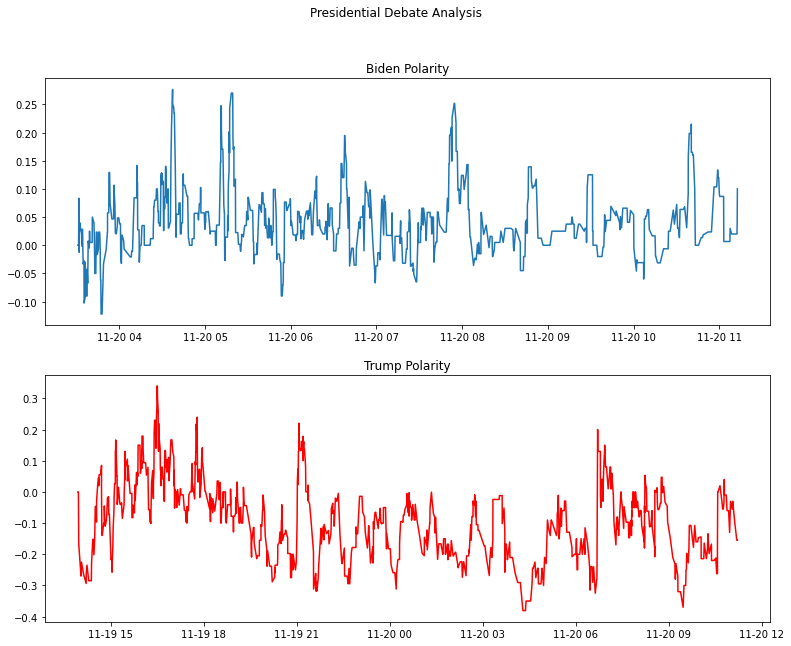

In [117]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()

# Using the BERT Model for Sentiment Analysis to the Tweeets 

In [118]:
import torch

In [119]:
# load model for sentiment analyse
model_sentiment = torch.load(r'NLP 4 models\model.pt')
toknizer_sentiment = torch.load(r'NLP 4 models\tokenizer.pt')

In [120]:
def sentiment_analysis(review):
    tokens = toknizer_sentiment.encode(review, return_tensors='pt')
    result = model_sentiment(tokens)
    return int(torch.argmax(result[0])) + 1


df['Sentiment'] = df['Preprocessed_tweet'].apply(lambda x: sentiment_analysis(x[:512]))

In [122]:
df.head(10)

,Tweets,Timestamp,Biden,Trump,Preprocessed_tweet,Polarity,Subjectivity,Sentiment
0,RT @acook5ct: 🌟Tomorrow is @POTUS birthday 🌟 P...,2021-11-20 11:12:38,1.0,0.0,RT @acook5ct: 🌟Tomorrow @POTUS birthday 🌟 Plea...,0.6,0.40,5
1,#JoeBiden says best part of turkey is left win...,2021-11-20 11:12:30,1.0,0.0,#JoeBiden say best part turkey left wing https...,0.5,0.15,5
2,USA: Joe Biden podrá seguir comulgando. Les da...,2021-11-20 11:12:21,1.0,0.0,USA: Joe Biden podrá seguir comulgando. Les da...,0.0,0.00,1
3,RT @GordonGChang: #JoeBiden on Wednesday issue...,2021-11-20 11:11:38,1.0,0.0,RT @GordonGChang: #JoeBiden Wednesday issued s...,0.0,0.00,1
4,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",2021-11-20 11:10:10,1.0,0.0,"#RIP #JoeBiden, ከተመለስክ እንጠላሌን",0.0,0.00,1
5,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...,2021-11-20 11:09:38,1.0,0.0,RT @NTVJustIn: అమెరికా తాత్కాలిక అధ్య‌క్షురాలి...,0.0,0.00,1
6,#ResistTheCult... I am a #PROGRESSIVE #DEMOCRA...,2021-11-20 11:09:02,1.0,0.0,#ResistTheCult... I #PROGRESSIVE #DEMOCRAT sta...,0.0,0.00,1
7,'#Israel' hands over body of unknown person in...,2021-11-20 11:08:34,1.0,0.0,'#Israel' hand body unknown person instead one...,-0.1,0.60,1
8,RT @CDNnow: President #JoeBiden’s Schedule for...,2021-11-20 11:07:33,1.0,0.0,RT @CDNnow: President #JoeBiden’s Schedule Fri...,0.0,0.00,1
9,#USA President #JoeBiden extended greetings to...,2021-11-20 11:07:24,1.0,0.0,#USA President #JoeBiden extended greeting Sik...,0.0,0.00,5


In [145]:
biden = df[df['Biden']==1][['Timestamp', 'Sentiment']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Sentiment'] = biden.Sentiment.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'Sentiment']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Sentiment'] = trump.Sentiment.rolling(10, min_periods=3).mean()

In [146]:
trump = trump.fillna(0)
# trump["Timestamp_"] = trump["Timestamp"].apply(lambda x: str(x)[5:10])
trump.head()

,Timestamp,Sentiment,MA Sentiment
999,2021-11-19 13:56:38,1,0.0
998,2021-11-19 13:57:35,1,0.0
997,2021-11-19 13:58:11,1,1.0
996,2021-11-19 14:00:10,3,1.5
995,2021-11-19 14:02:36,1,1.4


In [147]:
biden = biden.fillna(0)
biden.head()

,Timestamp,Sentiment,MA Sentiment
999,2021-11-20 03:31:00,1,0.0
998,2021-11-20 03:31:27,1,0.0
997,2021-11-20 03:31:40,1,1.0
996,2021-11-20 03:31:54,1,1.0
995,2021-11-20 03:31:56,1,1.0


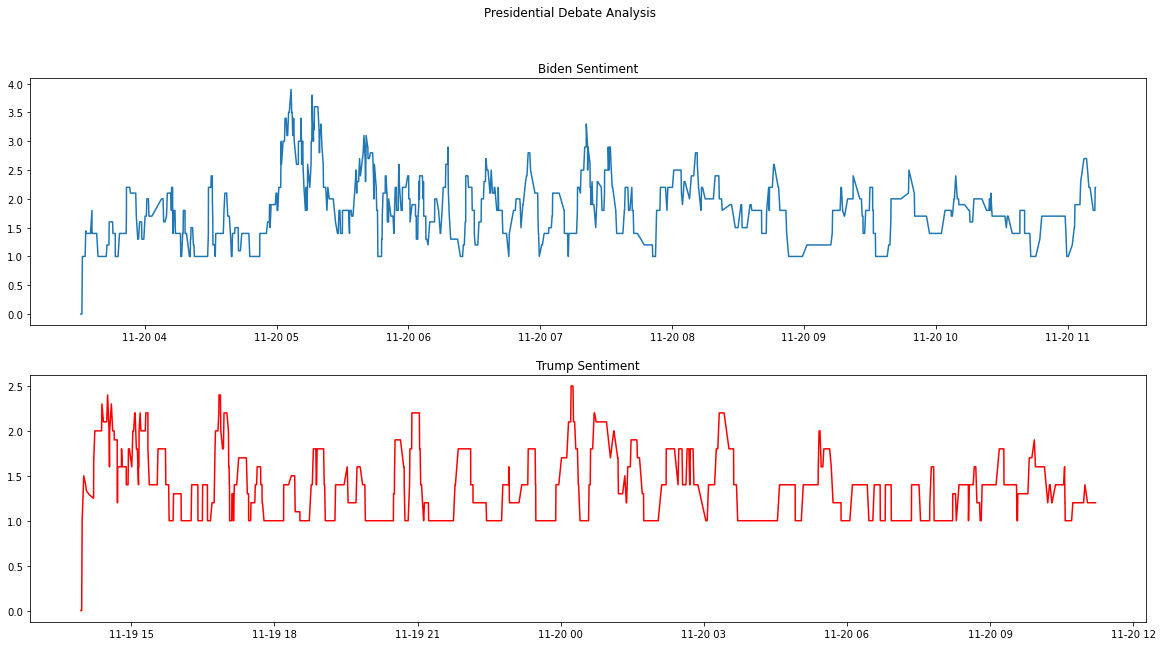

In [149]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

axes[0].plot(biden['Timestamp'], biden['MA Sentiment'])
axes[0].set_title("\n".join(["Biden Sentiment"]))
axes[1].plot(trump['Timestamp'], trump['MA Sentiment'], color='red')
axes[1].set_title("\n".join(["Trump Sentiment"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()